<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains practice examples of the following topics:

* Linear Regression	
  - Linear regression
  - Ridge ($L_2$ regularization)
  - Lasso ($L_1$ regularization)
  - ElasticNet ($L_1$ + $L_2$ regularization)
	
* Linear Classification	
  -	Logistic regression

(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

In [33]:
! nvidia-smi

Tue Apr 30 03:46:04 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 36.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


# Linear regression

>$\hat{y}=wx + b$

>$\hat{y}=w_1x_1+ w_2x_2+ ...+ b$

>$Loss_{linear} = \frac{1}{2N} \sum_i{(\hat{y}-y)^2}$
(least square)

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Linear regression on wave dataset

w[0]: 0.393906  b: -0.031804


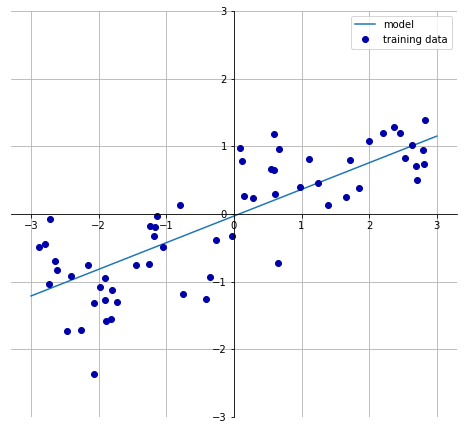

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [0]:
from sklearn.linear_model import LinearRegression

# creates wave data
X, y = mglearn.datasets.make_wave(n_samples=60)

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# regression (parameter estimation)
lr = LinearRegression().fit(X_train, y_train)

# check coeeficients and intercept
print("lr.coef_: ", lr.coef_)             # W
print("lr.intercept_:", lr.intercept_)      # b

lr.coef_:  [0.39390555]
lr.intercept_: -0.031804343026759746


score() Returns the coefficient of determination $R^2$ of the prediction $(1-u/v)$
 
 $u=\sum(\hat{y}-y)^2$ and $v=\sum(y-\bar{y})$, where $\bar{y}$ is the mean of $y$
  

In [5]:
# evaluation
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


## Linear regression on Boston house price data

In [6]:
# load boston data
X, y = mglearn.datasets.load_extended_boston()

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (379, 104)
y_train.shape = (379,)
X_test.shape = (127, 104)
y_test.shape = (127,)


In [7]:
# create object 
lr = LinearRegression()

# train
lr.fit(X_train, y_train)

# the above two statements can be combined as the next line
# lr = LinearRegression().fit(X_train, y_train)

# check coefficients and intercept
print("lr.coef_:", lr.coef_)             # w
print("lr.intercept_:", lr.intercept_)   # b

lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

In [8]:
# Performance evaluation
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.95
Test score: 0.61


==> Big difference between training accuracy and test accuracy: overfitting

## Ridge regression

> linear regression + L2 regularization

> $Loss_{ridge} = \frac{1}{2N} \sum_i{(\hat{y}-y)^2}+\alpha |W|^2$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridge = Ridge().fit(X_train, y_train)           # by default, alpha = 1

In [0]:
#print("ridge.coef_: {}".format(ridge.coef_))             # w
#print("ridge.intercept_: {}".format(ridge.intercept_))   # b

In [12]:
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.89
Test score: 0.75


Lower training accuracy, but higher test accuracy

In [13]:
# applying higher alpha  --> too strong constraint
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training score: 0.79
Test score: 0.64


In [14]:
# applying low alpha    --> appropriate constraint
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training score: 0.93
Test score: 0.77


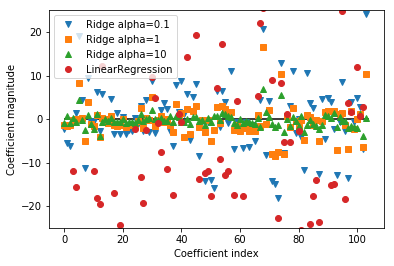

In [15]:
# coefficient magnitude
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso regression

> linear regression + L1 regularization

> $Loss_{lasso}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +\alpha |W|$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
from sklearn.linear_model import Lasso

In [17]:
# by default, alpha = 1
lasso = Lasso().fit(X_train, y_train)         # default alpha = 1, severe underfitting
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training score: 0.29
Test score: 0.21
Number of features used: 4


In [18]:
# Lasso with alpha = 0.01
lasso001 = Lasso(0.01, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training score: 0.90
Test score: 0.77
Number of features used: 33


In [19]:
# Lasso with alpha = 0.0001
lasso0001 = Lasso(0.0001, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso0001.coef_ != 0))

Training score: 0.95
Test score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

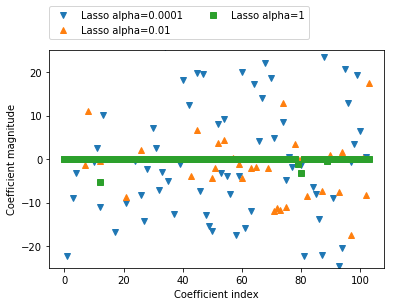

In [20]:
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")

#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## ElasticNet regression

> linear regression + L1 regularization + L2 regularization


> $Loss_{elastic\_net}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +a |W| +\frac{1}{2}b|W|^2$

> $Loss_{elastic\_net}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +\alpha\cdot \lambda |W| +\frac{1}{2} \alpha\cdot(1-\lambda)|W|^2$

 - $\alpha$: weight of regularization (L1 + L2)
 - $\lambda$: ratio of L1 regularization ($0 \leq\lambda\leq 1$)

 - $\alpha = a + b$, $\lambda = \frac{a}{a+b}$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [0]:
from sklearn.linear_model import ElasticNet

In [22]:
# by default, alpha = 1, l1_ratio = 0.5
elastic_net = ElasticNet().fit(X_train, y_train)
print("Training score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("Test score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net.coef_ != 0))

Training score: 0.33
Test score: 0.22
Number of features used: 38


In [23]:
# alpha = 0.01
elastic_net001 = ElasticNet(alpha=0.01, l1_ratio = 0.5).fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic_net001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic_net001.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net001.coef_ != 0))

Training set score: 0.86
Test set score: 0.72
Number of features used: 84


In [24]:
# alpha = 0.001
elastic_net0001 = ElasticNet(alpha=0.001, l1_ratio = 0.5).fit(X_train, y_train)
print("Training score: {:.2f}".format(elastic_net0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(elastic_net0001.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net0001.coef_ != 0))

Training score: 0.92
Test score: 0.78
Number of features used: 95


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
# alpha = 0.0001
elastic_net00001 = ElasticNet(alpha=0.0001, l1_ratio = 0.5).fit(X_train, y_train)
print("Training score: {:.2f}".format(elastic_net00001.score(X_train, y_train)))
print("Test score: {:.2f}".format(elastic_net00001.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net00001.coef_ != 0))

Training score: 0.94
Test score: 0.73
Number of features used: 103


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0, 0.5, 'Coefficient magnitude')

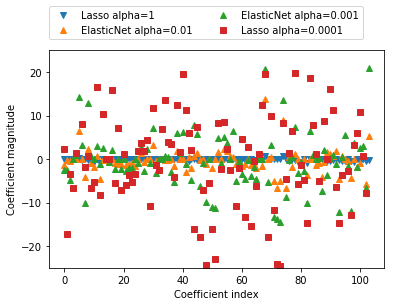

In [26]:
plt.plot(elastic_net.coef_, 'v', label="Lasso alpha=1")
plt.plot(elastic_net001.coef_, '^', label="ElasticNet alpha=0.01")
plt.plot(elastic_net0001.coef_, '^', label="ElasticNet alpha=0.001")
plt.plot(elastic_net00001.coef_, 's', label="Lasso alpha=0.0001")

#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Linear classification

* Binary classification
> - class +1 if $f(x) = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b > 0$
> - class -1 if $f(x) = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b < 0$

> Note! Class boundary is hyperplane

* Multi-class classification: $ŷ = argmax_j {f_j(x)=[\sum_i{w_{ji} x_i} + b_j]} = argmax_j {[w_{j1} x_1 + w_{j2} x_2+...+b_j]}$

* Popular fitting algorithms
> * Logistic regression (linear_model.LogisticRegression)
> * (linear) Support Vector Machine (SVM)



## Logistic regression
* binary classification ($y$ = 0 or 1)
* $\hat{y} = sigmoid(\sum_i{w_ix_i+b})$
* $ Loss_{logistic} = \frac{1}{2N}(y - \hat{y})^2 + \alpha |W|_L$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


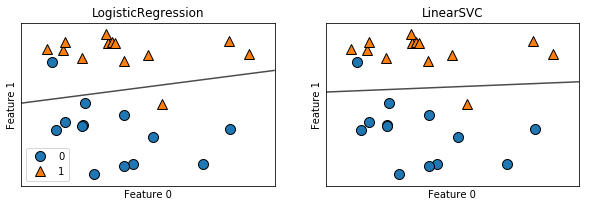

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LogisticRegression(),LinearSVC()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

## hyper parameter C to control regularization 

**small C** means **stronger regularization**

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# C = 1
logreg = LogisticRegression().fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg.score(X_test, y_test))) 

Training score: 0.955
Test score: 0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# C = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training score: 0.972
Test score: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training score: 0.934
Test score: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


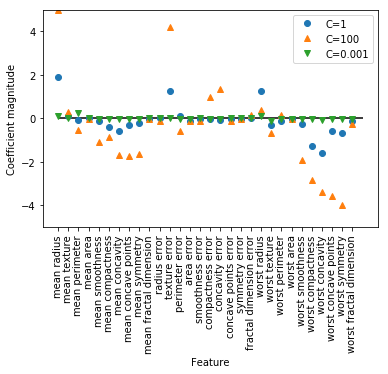

In [32]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()